In [33]:
pip install seaborn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install scikit-learn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [36]:
#PATH = 'covid_19_in_education.xlsx'
df = pd.read_csv('covid_19_in_education.csv')

In [37]:
df.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,4.570000e+15,17-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,6.440000e+15,29-03-2021,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,5.000000e+15,18-03-2021,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,5.520000e+15,24-03-2021,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,5.030000e+15,18-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


deleting unnecessary columns

In [38]:
df = df.drop('submission_id', axis=1)
df = df.drop('submission_date', axis=1)
# df = df.drop('Unnamed: 9', axis=1)

In [39]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


finding unique values in "age" column

In [40]:
n = len(pd.unique(df['age']))
print("No.of.unique values :",n)

No.of.unique values : 6


In [41]:
a = df['age'].unique()
print(sorted(a))

['16 to 25 years old', '26 to 35 years old', '36 to 45 years old', 'Not Available', 'Over 45 years old', 'Under 16']


In [42]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


In [43]:
#df['gender'] = int(df['gender'])
print (df.dtypes)

gender                                                            object
age                                                               object
geography                                                         object
financial_situation                                               object
education                                                         object
employment_status                                                 object
submission_state                                                  object
can_children_observe_deterioration_of_basic_services_of_school     int64
do_children_3_and_17_yrs_receive_regular_school_meals             object
are_there_teachers_at_scheduled_class_hours                       object
dtype: object


In [44]:
n = len(pd.unique(df['financial_situation']))
print("No.of.unique values :",n)

print()

a = df['financial_situation'].unique()
print(sorted(a))

No.of.unique values : 8

['I can afford food and regular expenses, but nothing else', 'I can afford food, but nothing else', 'I can afford food, regular expenses, and clothes, but nothing else', 'I can comfortably afford food, clothes, and furniture, and I have savings', 'I can comfortably afford food, clothes, and furniture, but I don’t have savings', 'I cannot afford enough food for my family', 'Not Available', 'Prefer not to answer']


In [45]:
n = len(pd.unique(df['gender']))
print("No.of.unique values :",n)

print()

a = df['gender'].unique()
print(sorted(a))

No.of.unique values : 5

['Female', 'Male', 'Non-Binary', 'Not Available', 'Prefer not to answer']


In [46]:
df = df.drop('can_children_observe_deterioration_of_basic_services_of_school', axis=1)
df = df.drop('do_children_3_and_17_yrs_receive_regular_school_meals', axis=1)
df = df.drop('are_there_teachers_at_scheduled_class_hours', axis=1)


In [47]:
print (df.dtypes)

gender                 object
age                    object
geography              object
financial_situation    object
education              object
employment_status      object
submission_state       object
dtype: object


In [48]:
final_data = pd.get_dummies(df, drop_first = True)

In [49]:
final_data.head()

,gender_Male,gender_Non-Binary,gender_Not Available,gender_Prefer not to answer,age_26 to 35 years old,age_36 to 45 years old,age_Not Available,age_Over 45 years old,age_Under 16,geography_Not Available,...,submission_state_Monagas,submission_state_Mérida,submission_state_Nueva Esparta,submission_state_Portuguesa,submission_state_Sucre,submission_state_Trujillo,submission_state_Táchira,submission_state_Vargas,submission_state_Yaracuy,submission_state_Zulia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn import preprocessing

In [53]:
label_encoder = preprocessing.LabelEncoder()
df.copy()


In [54]:
df['financial_situation_label']= label_encoder.fit_transform(df['financial_situation'])

In [55]:
df['financial_situation_label']

0       0
1       5
2       3
3       1
4       0
       ..
4431    1
4432    1
4433    2
4434    0
4435    0
Name: financial_situation_label, Length: 4436, dtype: int32

In [56]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,financial_situation_label
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,5
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,3
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0


In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
geo_data = df.loc[df['geography'] == 'Suburban/Peri-urban']



In [60]:
geo_data.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,financial_situation_label
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,5
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0
7,Female,Over 45 years old,Suburban/Peri-urban,I cannot afford enough food for my family,Technical school diploma or degree completed,"I work part-time, either as an employee or sel...",Miranda,5


In [66]:
geo_data = geo_data[['education']]
geo_data.value_counts()

education                                        
University or college degree completed               403
Secondary school/ high school completed              346
Technical school diploma or degree completed         199
Some university or college                           132
Some technical education (e.g polytechnic school)     88
Post-graduate education                               71
Some secondary school / high school                   71
Primary school completed                              34
Prefer not to answer                                  12
Some primary education                                11
No formal education                                    4
Post graduate                                          1
Secondary/high school                                  1
Technical school                                       1
dtype: int64

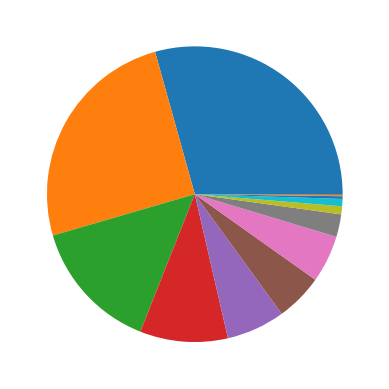

In [65]:
plt.pie(geo_data.value_counts())
plt.show() 

In [67]:
labels = ['University or college degree completed','Secondary school/ high school completed','Technical school diploma or degree completed','Some university or college','Some technical education (e.g polytechnic school)','Post-graduate education','Some secondary school / high school','Primary school completed','Prefer not to answer','Some primary education','No formal education','Post graduate','Secondary/high school','Technical school']

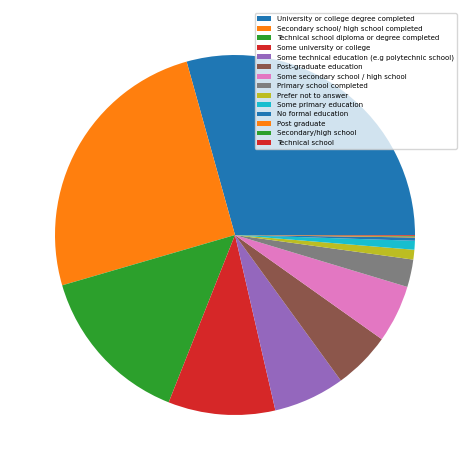

Text(3, 8, 'random')

In [86]:
from matplotlib.pyplot import legend


plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()

In [87]:
df['geography'].unique()

array(['Suburban/Peri-urban', 'City center or metropolitan area', 'Rural',
       'Not Available'], dtype=object)

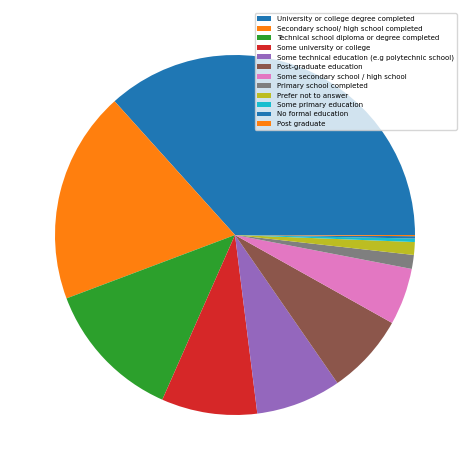

In [88]:
geo_data = df.loc[df['geography'] == 'City center or metropolitan area']
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()

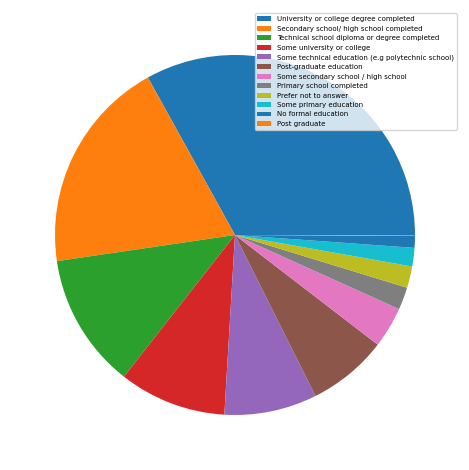

In [89]:
geo_data = df.loc[df['geography'] == 'Rural']
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()